In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from keras.models import Model, Sequential
from keras.layers import Input, Dense
from keras.optimizers import Adam
from sklearn.metrics import recall_score,confusion_matrix,classification_report,precision_score, f1_score,precision_recall_curve,accuracy_score, precision_score
from keras.metrics import Recall, Accuracy, F1Score , confusion_metrics , accuracy_metrics
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import to_categorical
from keras.layers import InputLayer, Dense, Dropout
import  keras.regularizers 
from keras.optimizers import Adam

2024-06-14 11:44:02.964014: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-14 11:44:03.124339: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1Ut0M6XtbZDDr--0TPDtdAf65fN9LmiKJ

Downloading...
From (original): https://drive.google.com/uc?id=1Ut0M6XtbZDDr--0TPDtdAf65fN9LmiKJ
From (redirected): https://drive.google.com/uc?id=1Ut0M6XtbZDDr--0TPDtdAf65fN9LmiKJ&confirm=t&uuid=43c2cade-c01f-478e-bd52-8d899f71866d
To: /home/amir/Machine_learning/HWs/HW_MiniProj#3/creditcard.csv
100%|█████████████████████████████████████████| 151M/151M [05:43<00:00, 439kB/s]


## Info

In [26]:
data = pd.read_csv('creditcard.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [3]:
data?

Type:        DataFrame
String form:
Time         V1         V2        V3        V4        V5  \
           0            0.0  -1.3598 <...>   0
           284803      0
           284804      0
           284805      0
           284806      0
           
           [284807 rows x 31 columns]
Length:      284807
File:        ~/miniconda3/envs/PY/lib/python3.11/site-packages/pandas/core/frame.py
Docstring:  
Two-dimensional, size-mutable, potentially heterogeneous tabular data.

Data structure also contains labeled axes (rows and columns).
Arithmetic operations align on both row and column labels. Can be
thought of as a dict-like container for Series objects. The primary
pandas data structure.

Parameters
----------
data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    Dict can contain Series, arrays, constants, dataclass or list-like objects. If
    data is a dict, column order follows insertion-order. If a dict contains Series
    which have an index defined, it 

In [28]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
dir()
?
cor=data.corr()
print(cor)
data.hist()
data.describe()
data.head()
data.info()
print(data.columns)
print(data.shape)








## Preprocessing

In [29]:
# Load dataset
data = pd.read_csv('creditcard.csv')
print(f'raw dataset shape: {data.shape}')
# Drop the 'Time' column
data = data.drop(['Time'], axis=1)

# Normalize the 'Amount' column
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

# Split into features and target
X = data.drop('Class', axis=1)
y = data['Class']
print(f'X: {X.shape}\ny:{y.shape}')

# Normalize all features
#scaler = StandardScaler()
#X = scaler.fit_transform(X)


# Get unique value counts for a specific column
unique_counts = data['Class'].value_counts()
print(unique_counts)

raw dataset shape: (284807, 31)
X: (284807, 29)
y:(284807,)
Class
0    284315
1       492
Name: count, dtype: int64


In [31]:
# Oversample the training data using SMOTE
sm = SMOTE(random_state=24,sampling_strategy='minority')
X_res, y_res = sm.fit_resample(X, y)


# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=24)

X_train.shape , X_test.shape


# One-hot encode the labels
y_train_onehot = to_categorical(y_train, num_classes=2)
y_test_onehot = to_categorical(y_test, num_classes=2)
X_res.shape, y_res.shape,X_train.shape , X_test.shape




((568630, 29), (568630,), (454904, 29), (113726, 29))

In [24]:
y_train,y_train_onehot

(270117    0
 410167    1
 14787     0
 431655    1
 387683    1
          ..
 478609    1
 516439    1
 211136    0
 899       0
 242082    0
 Name: Class, Length: 454904, dtype: int64,
 array([[1., 0.],
        [0., 1.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]]))

## noise & Denoising Autoencoder

In [32]:

input_dim = X_train.shape[1]
# Define the denoising autoencoder architecture with regularization and dropout
autoencoder = Sequential([
    Input(shape=(input_dim,),name='input'),
    Dense(22, activation='tanh'),
    Dense(15, activation='tanh'),
    Dense(10, activation='leaky_relu', name="encode"),
    Dense(15, activation='tanh', ),
    Dense(22, activation='leaky_relu',),
    Dense(input_dim, activation='linear')
])
autoencoder.compile(optimizer='Nadam', loss='mean_squared_error')
#optimizer=Adam(learning_rate=0.001)
# Add Gaussian noise to the training data
noise_factor = 0.1
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=0.5, size=X_train.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)

# Train the autoencoder
dae_history = autoencoder.fit(X_train_noisy, X_train, epochs=30, batch_size=200, shuffle=True, validation_split=0.2, 
                             callbacks=[EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)])

# Extract the encoder part for feature extraction
encoder_model = Model(inputs=autoencoder.layers[0].input, outputs=autoencoder.get_layer("encode").output)

X_train_encoded = encoder_model.predict(X_train)
X_test_encoded = encoder_model.predict(X_test)


Epoch 1/30
1820/1820 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 5.4632 - val_loss: 1.6613
Epoch 2/30
1820/1820 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.3964 - val_loss: 1.0928
Epoch 3/30
1820/1820 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.0533 - val_loss: 0.9300
Epoch 4/30
1820/1820 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.9171 - val_loss: 0.8481
Epoch 5/30
1820/1820 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.8406 - val_loss: 0.7999
Epoch 6/30
1820/1820 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7982 - val_loss: 0.7660
Epoch 7/30
1820/1820 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7578 - val_loss: 0.7497
Epoch 8/30
1820/1820 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7277 - val_loss: 0.7084
Epoch 9/30
1820/1820 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7049 - val_loss: 0.6882
Epoch 10/30
1820/1820 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6912 - val_loss: 0.6706
Epoch 11/30
1820/1820 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6722 - val_loss: 0.6564
Epoch 12/30
1820/1820 ━━━━━━━━

### s

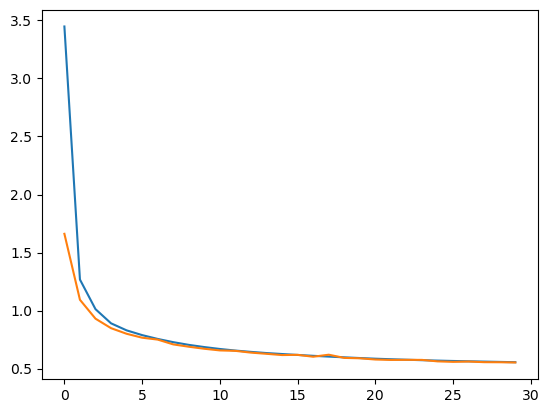

In [35]:
# Extract loss values from the history object
loss = dae_history.history['loss']
val_loss = dae_history.history['val_loss']

# Create a new figure for the plot
plt.figure()

# Plot the training and validation loss for autoencoder
plt.plot(loss, label='Autoencoder Training Loss')
plt.plot(val_loss, label='Autoencoder Validation Loss')


## Deep fully connected NN classifier


In [8]:
X_train_encoded.shape , y_train.shape

((454904, 10), (454904,))

In [46]:

# Define the classifier architecture using Sequential
classifier = Sequential([
    InputLayer(shape=(10,)),
    Dense(22, activation='tanh'),
    Dense(15, activation='tanh'),
    Dense(10, activation='relu'),
    Dense(5, activation='relu'),
    Dense(2, activation='softmax')
])
classifier.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy',Recall()])
#optimizer=Adam(learning_rate=0.001)
# Define the ModelCheckpoint and EarlyStopping callbacks
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1, restore_best_weights=True,min_delta=0.005)

# Train the classifier
history = classifier.fit(X_train_encoded, y_train_onehot, epochs=50, batch_size=200, shuffle=True, validation_split=0.2, callbacks=[checkpoint, early_stopping])


Epoch 1/50
1820/1820 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7548 - loss: 0.5096 - recall_6: 0.7547 - val_accuracy: 0.9169 - val_loss: 0.2215 - val_recall_6: 0.9169
Epoch 2/50
1820/1820 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9233 - loss: 0.2021 - recall_6: 0.9233 - val_accuracy: 0.9308 - val_loss: 0.1769 - val_recall_6: 0.9308
Epoch 3/50
1820/1820 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9327 - loss: 0.1725 - recall_6: 0.9327 - val_accuracy: 0.9343 - val_loss: 0.1670 - val_recall_6: 0.9343
Epoch 4/50
1820/1820 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9344 - loss: 0.1660 - recall_6: 0.9344 - val_accuracy: 0.9381 - val_loss: 0.1613 - val_recall_6: 0.9381
Epoch 5/50
1820/1820 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9388 - loss: 0.1588 - recall_6: 0.9388 - val_accuracy: 0.9397 - val_loss: 0.1569 - val_recall_6: 0.9397
Epoch 6/50
1820/1820 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9401 - loss: 0.1557 - recall_6: 0.9401 - val_accuracy: 0.9416 - val_loss

## Visualization

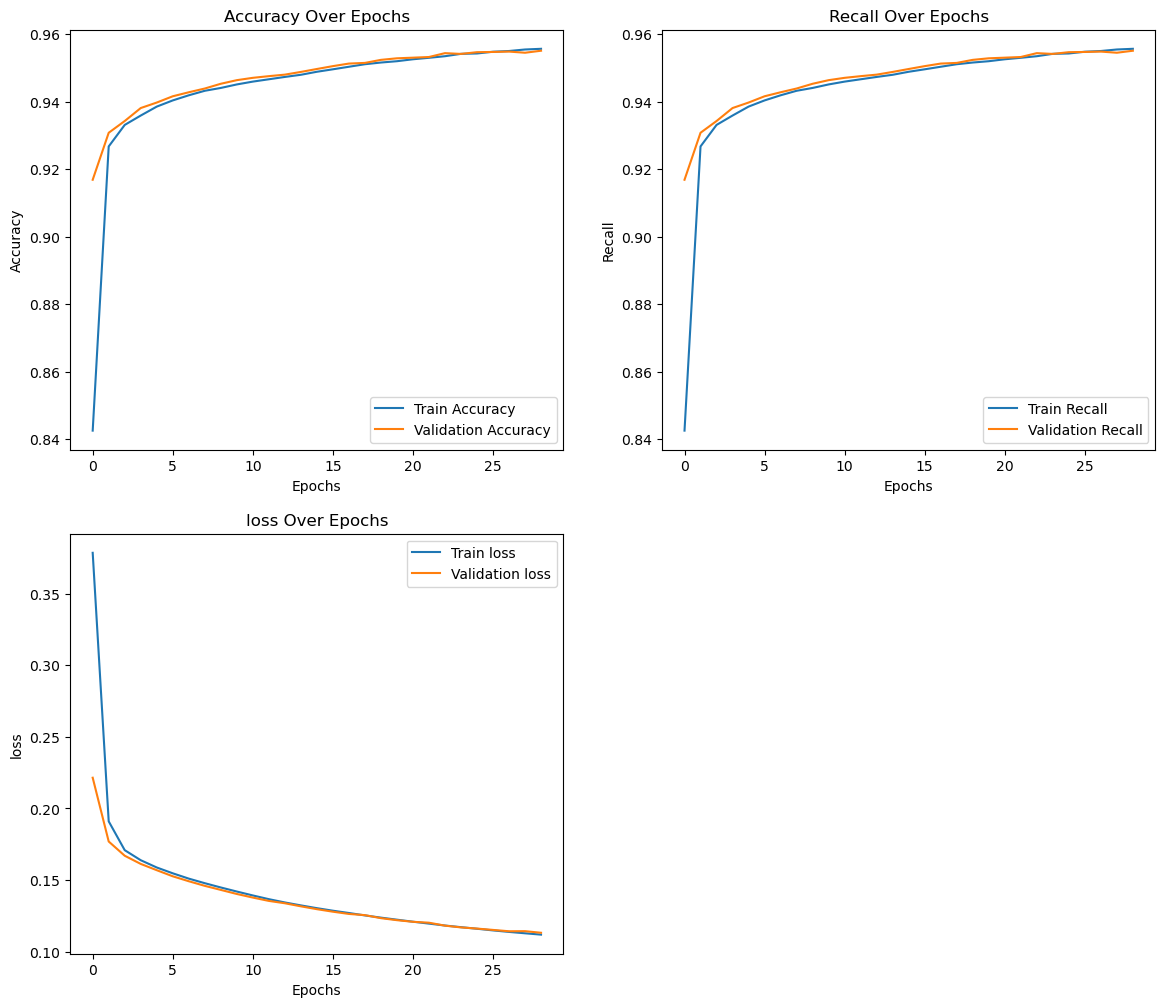

In [48]:

# Plot the recall and accuracy
plt.figure(figsize=(14, 12))

# Plot accuracy
plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

# Plot recall
plt.subplot(2, 2, 2)
plt.plot(history.history['recall_6'], label='Train Recall')
plt.plot(history.history['val_recall_6'], label='Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.title('Recall Over Epochs')
plt.legend()

# Plot the loss

plt.subplot(2, 2, 3)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('loss Over Epochs')
plt.legend()

plt.show()

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 3s 750us/step


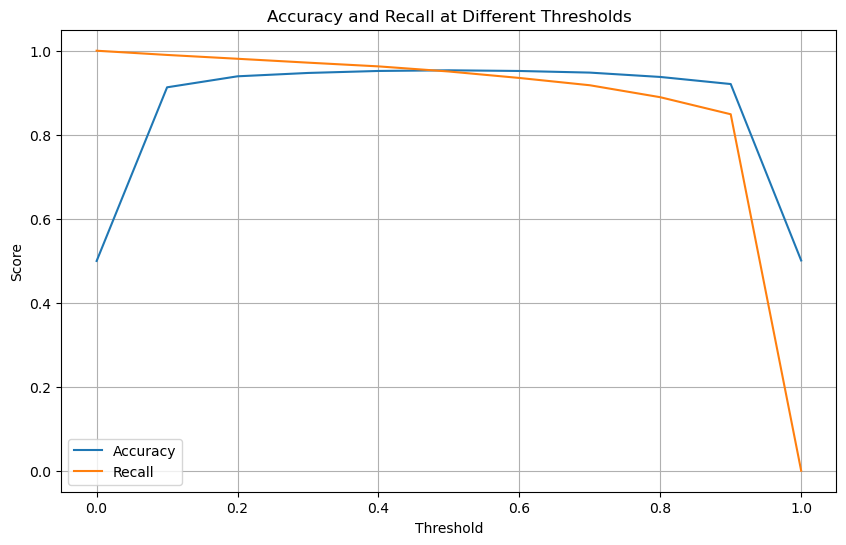

In [49]:
# Evaluate the classifier
y_pred_probs = classifier.predict(X_test_encoded)

# Calculate metrics at various thresholds
thresholds = np.arange(0.0, 1.1, 0.1)
accuracies = []
recalls = []

for threshold in thresholds:
    y_pred_classes = (y_pred_probs[:, 1] >= threshold).astype(int)
    accuracies.append(accuracy_score(y_test, y_pred_classes))
    recalls.append(recall_score(y_test, y_pred_classes))

# Plot accuracy and recall vs threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracies, label='Accuracy')
plt.plot(thresholds, recalls, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Accuracy and Recall at Different Thresholds')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'recall_5', 'val_accuracy', 'val_loss', 'val_recall_5'])

## Evaluation

In [51]:
# Evaluate the classifier
y_pred = classifier.predict(X_test_encoded)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
conf_matrix = confusion_matrix(y_test, y_pred_classes)
class_report = classification_report(y_test, y_pred_classes)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 3s 745us/step
Accuracy: 0.9533879675711798
Precision: 0.955891987605135
Recall: 0.9505229425643554
F1 Score: 0.9531999046517582
Confusion Matrix:
 [[54441  2491]
 [ 2810 53984]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95     56932
           1       0.96      0.95      0.95     56794

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726



In [101]:
data = pd.read_csv('creditcard.csv')
# Load dataset
data = pd.read_csv('creditcard.csv')
print(f'raw dataset shape: {data.shape}')
# Drop the 'Time' column
data = data.drop(['Time'], axis=1)

# Normalize the 'Amount' column
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

# Split into features and target
X = data.drop('Class', axis=1)
y = data['Class']
print(f'X: {X.shape}\ny:{y.shape}')


# Get unique value counts for a specific column
unique_counts = data['Class'].value_counts()
print(unique_counts)


# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)


# One-hot encode the labels
y_train_onehot = to_categorical(y_train, num_classes=2)
y_test_onehot = to_categorical(y_test, num_classes=2)
X_res.shape, y_res.shape,X_train.shape , X_test.shape


input_dim = X_train.shape[1]
# Define the denoising autoencoder architecture with regularization and dropout
autoencoder = Sequential([
    Input(shape=(input_dim,),name='input'),
    Dense(22, activation='tanh'),
    Dense(15, activation='tanh'),
    Dense(10, activation='leaky_relu', name="encode"),
    Dense(15, activation='tanh', ),
    Dense(22, activation='leaky_relu',),
    Dense(input_dim, activation='linear')
])
autoencoder.compile(optimizer='Nadam', loss='mean_squared_error')
#optimizer=Adam(learning_rate=0.001)
# Add Gaussian noise to the training data
noise_factor = 0.1
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=0.5, size=X_train.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)

# Train the autoencoder
dae_history = autoencoder.fit(X_train_noisy, X_train, epochs=30, batch_size=200, shuffle=True, validation_split=0.2, 
                             callbacks=[EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)])

# Extract the encoder part for feature extraction
encoder_model = Model(inputs=autoencoder.layers[0].input, outputs=autoencoder.get_layer("encode").output)

X_train_encoded = encoder_model.predict(X_train)
X_test_encoded = encoder_model.predict(X_test)

# Define the classifier architecture using Sequential
classifier = Sequential([
    InputLayer(shape=(10,)),
    Dense(22, activation='tanh'),
    Dense(15, activation='tanh'),
    Dense(10, activation='relu'),
    Dense(5, activation='relu'),
    Dense(2, activation='softmax')
])
classifier.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy',Recall(class_id=1)])
#optimizer=Adam(learning_rate=0.001)
# Define the ModelCheckpoint and EarlyStopping callbacks
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=0, restore_best_weights=True,min_delta=0.005)

# Train the classifier
history = classifier.fit(X_train_encoded, y_train_onehot, epochs=50, batch_size=200, shuffle=True, validation_split=0.2, callbacks=[checkpoint, early_stopping])



raw dataset shape: (284807, 31)
X: (284807, 29)
y:(284807,)
Class
0    284315
1       492
Name: count, dtype: int64
Epoch 1/30
912/912 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.8608 - val_loss: 0.6207
Epoch 2/30
912/912 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6020 - val_loss: 0.5527
Epoch 3/30
912/912 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5449 - val_loss: 0.5145
Epoch 4/30
912/912 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5126 - val_loss: 0.4935
Epoch 5/30
912/912 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4872 - val_loss: 0.4773
Epoch 6/30
912/912 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4761 - val_loss: 0.4618
Epoch 7/30
912/912 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4591 - val_loss: 0.4485
Epoch 8/30
912/912 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4492 - val_loss: 0.4358
Epoch 9/30
912/912 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4349 - val_loss: 0.4272
Epoch 10/30
912/912 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4231 - val_loss: 0.4142
Epoch 11/30
912/912 ━━━

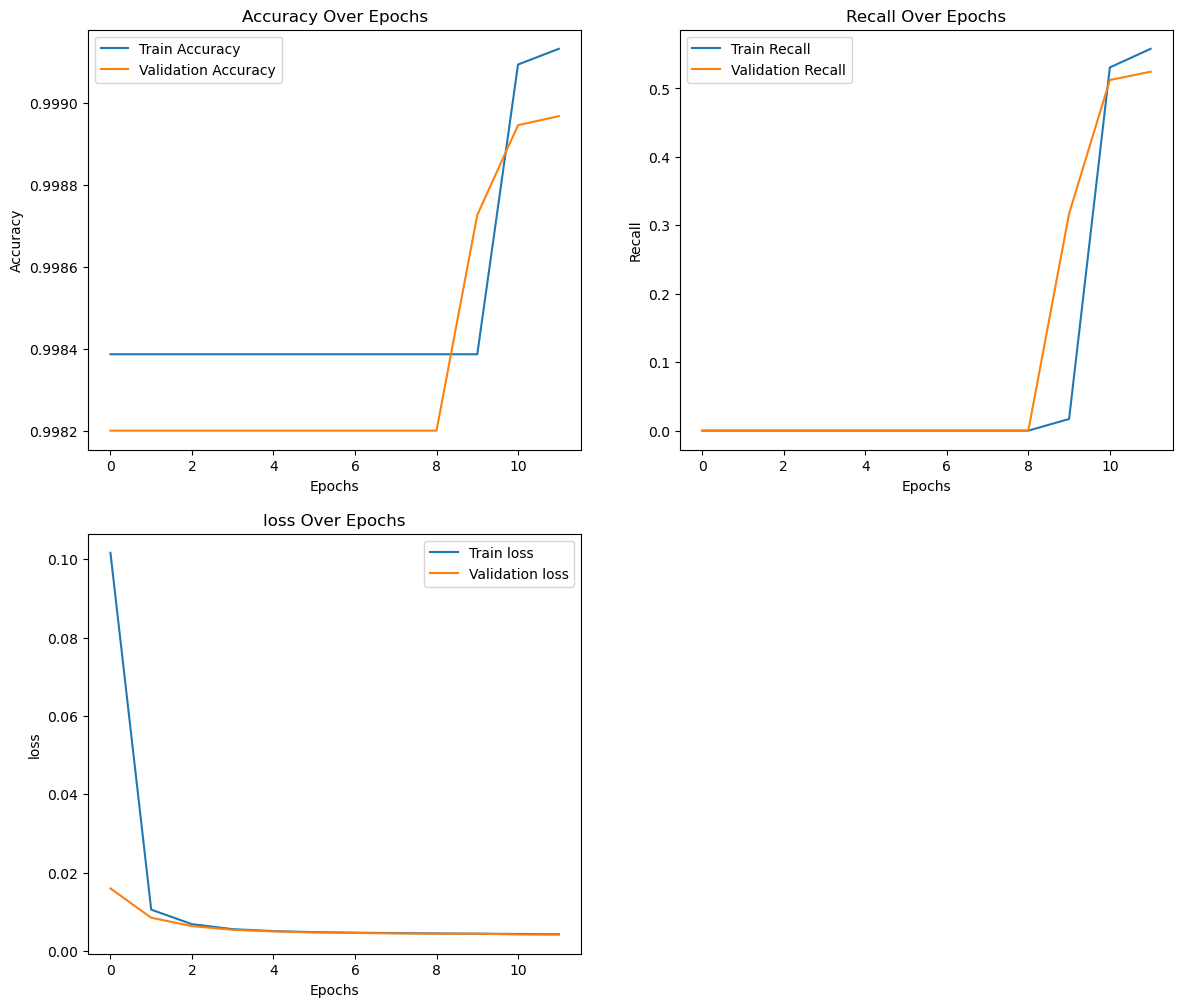

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 862us/step
Accuracy: 0.9979635546504687
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
 [[56846     0]
 [  116     0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56846
           1       0.00      0.00      0.00       116

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



/home/amir/miniconda3/envs/PY/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/amir/miniconda3/envs/PY/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/amir/miniconda3/envs/PY/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [102]:

# Plot the recall and accuracy
plt.figure(figsize=(14, 12))

# Plot accuracy
plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

# Plot recall
plt.subplot(2, 2, 2)
plt.plot(history.history['recall_15'], label='Train Recall')
plt.plot(history.history['val_recall_15'], label='Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.title('Recall Over Epochs')
plt.legend()

# Plot the loss

plt.subplot(2, 2, 3)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('loss Over Epochs')
plt.legend()

plt.show()
# Evaluate the classifier
y_pred = classifier.predict(X_test_encoded)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
conf_matrix = confusion_matrix(y_test, y_pred_classes)
class_report = classification_report(y_test, y_pred_classes)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 783us/step


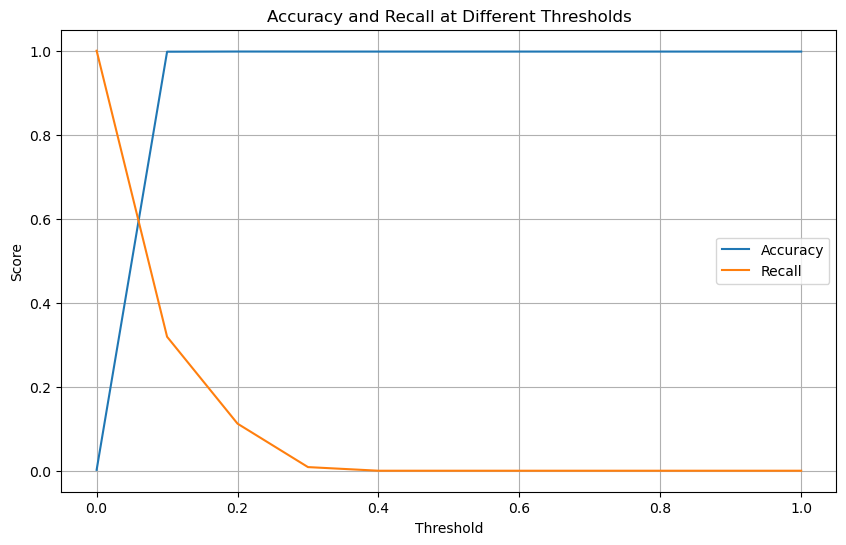

In [105]:
# Evaluate the classifier
y_pred_probs = classifier.predict(X_test_encoded)

# Calculate metrics at various thresholds
thresholds = np.arange(0.0, 1.1, 0.1)
accuracies = []
recalls = []

for threshold in thresholds:
    y_pred_classes = (y_pred_probs[:, 1] >= threshold).astype(int)
    accuracies.append(accuracy_score(y_test, y_pred_classes))
    recalls.append(recall_score(y_test, y_pred_classes))

# Plot accuracy and recall vs threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracies, label='Accuracy')
plt.plot(thresholds, recalls, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Accuracy and Recall at Different Thresholds')
plt.legend()
plt.grid(True)
plt.show()

In [103]:
from sklearn.metrics import confusion_matrix, classification_report

# Get predictions for the test set
y_pred_onehot = classifier.predict(X_test_encoded)
y_pred_prob = classifier.predict(X_test_encoded)
threshold = 0.3  # Adjust as necessary
y_pred = (y_pred_prob[:, 1] >= threshold).astype(int)

y_true = np.argmax(y_test_onehot, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Compute classification report
report = classification_report(y_true, y_pred, target_names=['Class 0', 'Class 1'])
print("\nClassification Report:")
print(report)


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 766us/step
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 724us/step
Confusion Matrix:
[[56846     0]
 [  115     1]]

Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00     56846
     Class 1       1.00      0.01      0.02       116

    accuracy                           1.00     56962
   macro avg       1.00      0.50      0.51     56962
weighted avg       1.00      1.00      1.00     56962

